In [13]:
%matplotlib inline

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [15]:
df = pd.read_csv("C:/Users/Weng/Desktop/Web economics/Dataset/train.csv")
df2 = pd.read_csv("C:/Users/Weng/Desktop/Web economics/Dataset/validation.csv")
df3 = pd.read_csv("C:/Users/Weng/Desktop/Web economics/Dataset/test.csv")

In [16]:
df3.shape

(299749, 23)

In [17]:
df.shape

(2697738, 26)

In [18]:
df.head()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,...,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,...,90,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111"
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."


In [19]:
def CTR_calc(data):
    Click_t_rate= "Click Through Rate= "+ str(round((np.count_nonzero(data.click.values)/data.shape[0])*100,4)) + ' %'
    return (Click_t_rate)

In [20]:
CTR_calc(df)

'Click Through Rate= 0.0754 %'

#### Group by weekdays

In [21]:
pd.DataFrame(df.groupby('weekday').size()).reset_index()

,weekday,0
0,0,465241
1,1,408417
2,2,328051
3,3,380111
4,4,361376
5,5,378028
6,6,376514


In [22]:
weekday_group = pd.DataFrame({'Count':df.groupby(['weekday','click']).size()}).reset_index () #Groupby function uses . size to get results()

In [23]:
weekday_group= weekday_group[weekday_group['click'] == 1].reset_index(drop=True)

In [24]:
pd.DataFrame({'impressions':df.groupby('weekday').size()}).reset_index(drop=True)

,impressions
0,465241
1,408417
2,328051
3,380111
4,361376
5,378028
6,376514


In [25]:
weekday_group= weekday_group.join(pd.DataFrame({'impressions':df.groupby('weekday').size()}).reset_index(drop=True))

In [26]:
weekday_group['CTR'] = (weekday_group['Count']/weekday_group['impressions'])*100

In [27]:
weekday_group

,weekday,click,Count,impressions,CTR
0,0,1,293,465241,0.062978
1,1,1,277,408417,0.067823
2,2,1,298,328051,0.090840
3,3,1,345,380111,0.090763
4,4,1,311,361376,0.086060
5,5,1,299,378028,0.079095
6,6,1,211,376514,0.056040


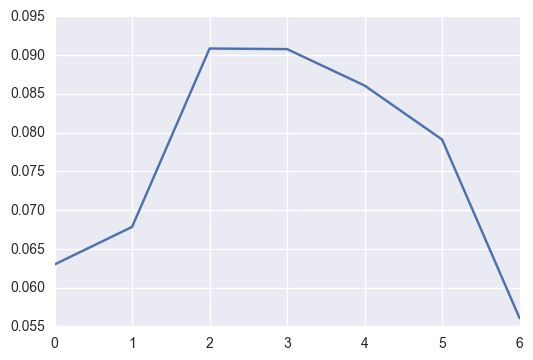

In [28]:
weekday_group.CTR.plot()

#### Group by hours

In [29]:
hour_group = pd.DataFrame({'Count':df.groupby(['hour','click']).size()}).reset_index ()
hour_group= hour_group[hour_group['click'] == 1].reset_index(drop=True)
pd.DataFrame({'impressions':df.groupby('hour').size()}).reset_index(drop=True)
hour_group= hour_group.join(pd.DataFrame({'impressions':df.groupby('hour').size()}).reset_index(drop=True))
hour_group['CTR'] = (hour_group['Count']/hour_group['impressions'])*100

In [30]:
hour_group.index -= 1

In [31]:
hour_group['hour']= hour_group.hour - 1

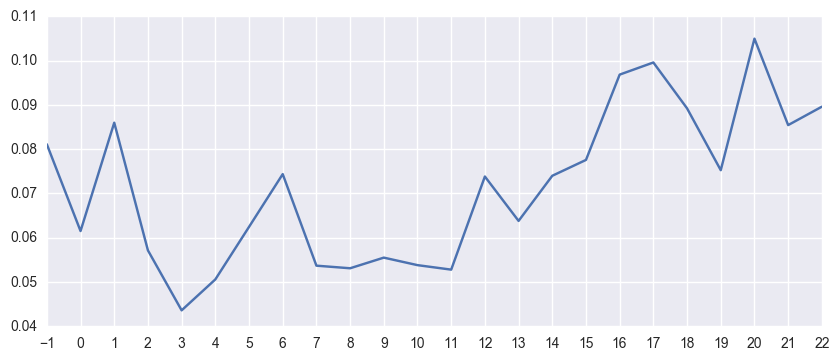

In [32]:
hour_group.CTR.plot(figsize=(10,4),xticks= (hour_group.hour).tolist())

#### Group by advertiser

In [33]:
ad_group = pd.DataFrame({'Count':df.groupby(['advertiser','click']).size()}).reset_index ()
ad_group= ad_group[ad_group['click'] == 1].reset_index(drop=True)
pd.DataFrame({'impressions':df.groupby('advertiser').size()}).reset_index(drop=True)
ad_group= ad_group.join(pd.DataFrame({'impressions':df.groupby('advertiser').size()}).reset_index(drop=True))
ad_group['CTR'] = (ad_group['Count']/ad_group['impressions'])*100

In [34]:
ad_group

,advertiser,click,Count,impressions,CTR
0,1458,1,451,540293,0.083473
1,2259,1,45,146778,0.030659
2,2261,1,37,120619,0.030675
3,2821,1,144,231416,0.062226
4,2997,1,251,54487,0.460660
5,3358,1,233,304782,0.076448
6,3386,1,358,498554,0.071808
7,3427,1,340,454031,0.074885
8,3476,1,175,346778,0.050465


70    173
77     99
80     57
50     50
88     44
6      37
73     36
31     34
20     29
76     27
Name: payprice, dtype: int64


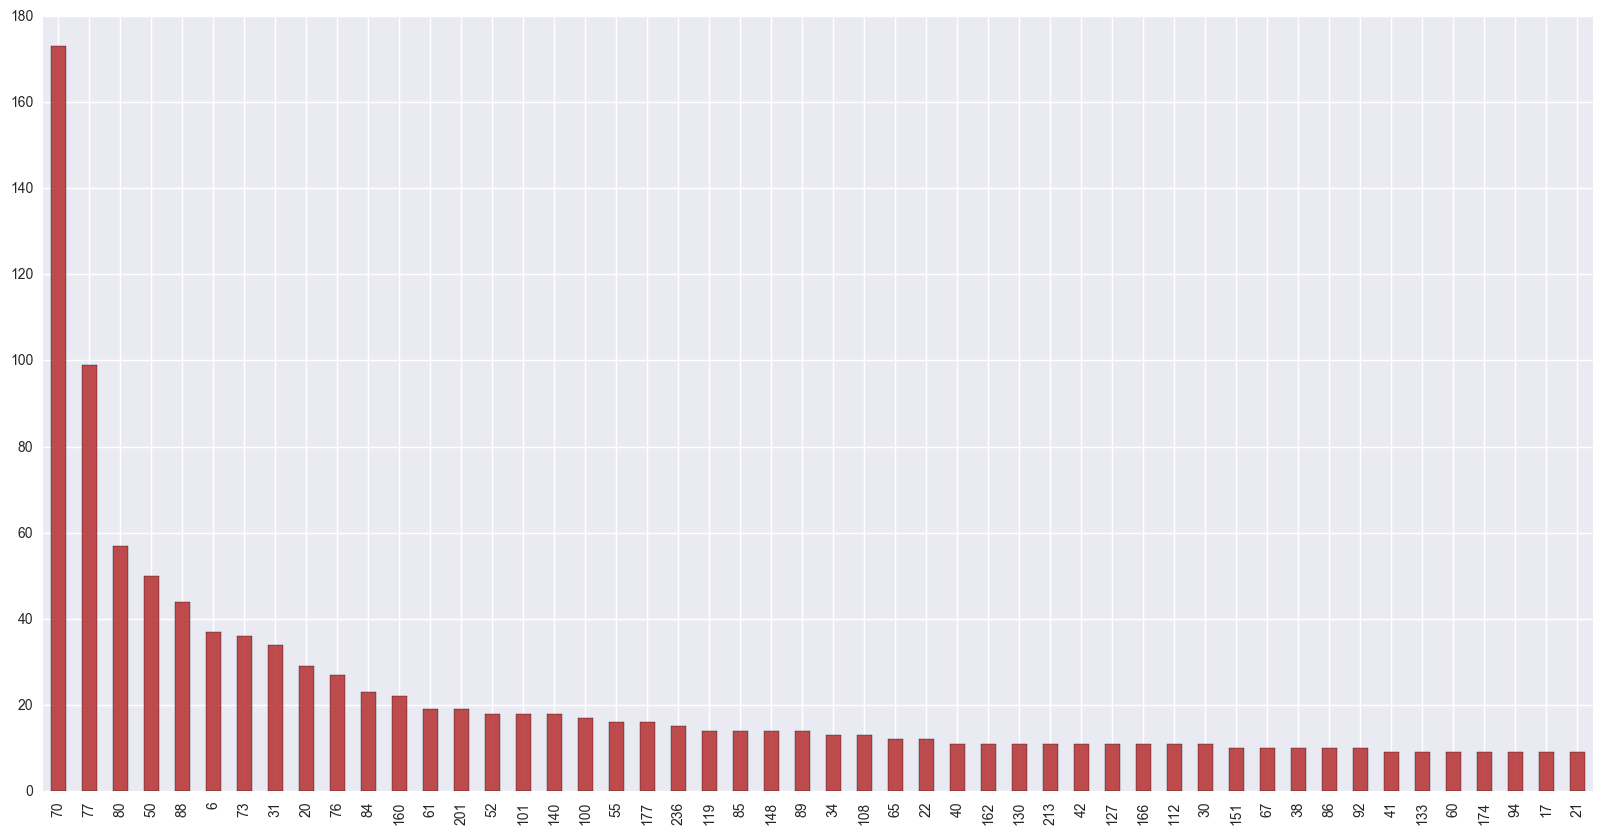

In [35]:
df[df['click'] == 1].payprice.value_counts(sort = True).head(50).plot.bar(color= 'firebrick', alpha = 0.8 ,figsize=(20,10))
print (df[df['click'] == 1].payprice.value_counts(sort = True).head(10))

70    155575
50    120315
20    118700
77     84957
80     76139
55     68721
5      49387
31     47625
88     45245
73     44361
Name: payprice, dtype: int64


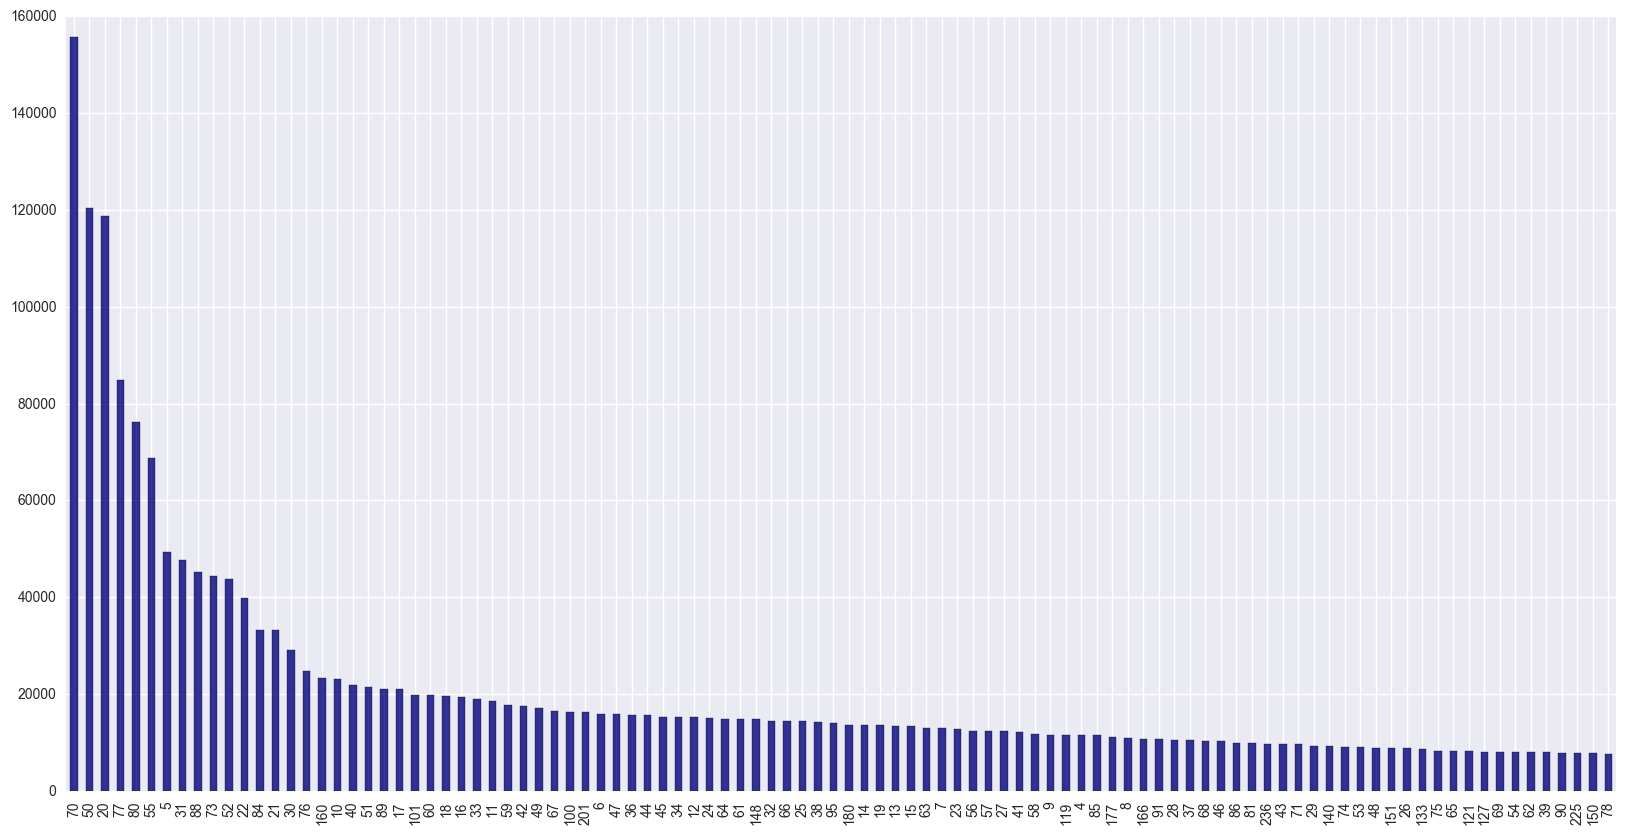

In [36]:
df.payprice.value_counts(sort = True).head(100).plot.bar(color= 'navy', alpha = 0.8, figsize=(20,10))
print (df.payprice.value_counts(sort = True).head(10))

Wall time: 27.1 s


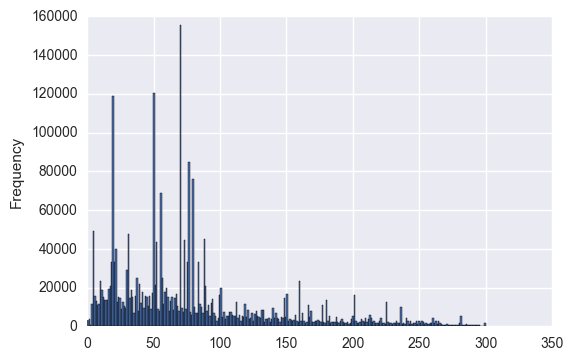

In [37]:
%%time
df.payprice.plot.hist(bins=284)


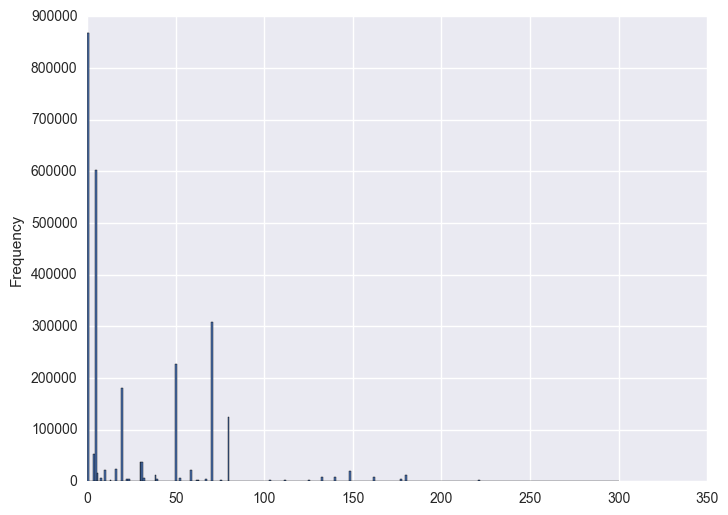

In [38]:
df.slotprice.plot.hist(bins=284,figsize= (8,6))

In [39]:
df.slotprice.value_counts(sort=False).size

284

In [40]:
ad_group.advertiser.index.tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8]

#### Grouped by adexchange with the highest CTR

In [41]:
adex_group = pd.DataFrame({'Count':df.groupby(['adexchange','click']).size()}).reset_index ()

In [42]:
adex_group= adex_group[adex_group['click'] == 1].reset_index(drop=True)

In [43]:
pd.DataFrame({'impressions':df.groupby('adexchange').size()}).reset_index(drop=True)

,impressions
0,815403
1,840105
2,900222
3,87521
4,54487


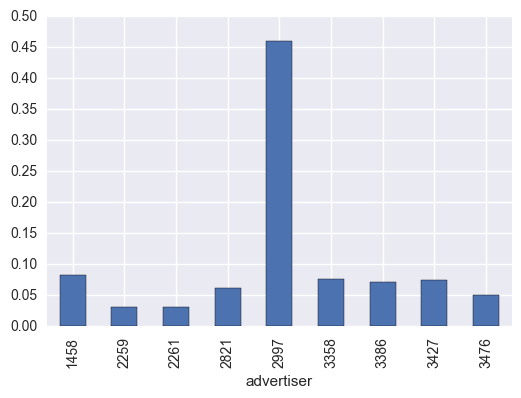

In [44]:
ad_group.plot.bar('advertiser','CTR',legend= False, yticks= np.arange(0,0.55,0.05))

In [45]:
adex_group

,adexchange,click,Count
0,1,1,658
1,2,1,436
2,3,1,641
3,4,1,48
4,null,1,251


In [48]:
adex_group= adex_group.join(pd.DataFrame({'impressions':df.groupby('adexchange').size()}).reset_index(drop=True))

In [49]:
adex_group['CTR'] = (adex_group['Count']/adex_group['impressions'])*100

In [50]:
adex_group

,adexchange,click,Count,impressions,CTR
0,1,1,658,815403,0.080696
1,2,1,436,840105,0.051898
2,3,1,641,900222,0.071205
3,4,1,48,87521,0.054844
4,null,1,251,54487,0.460660


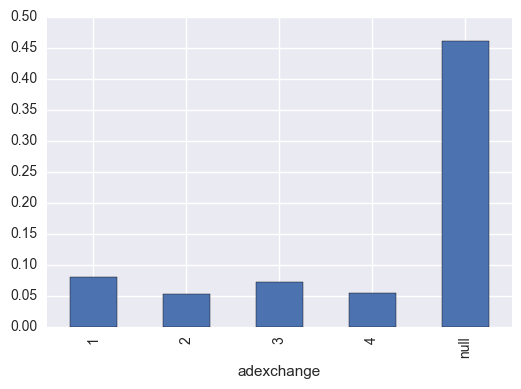

In [51]:
adex_group.plot.bar('adexchange','CTR',legend= False, yticks= np.arange(0,0.55,0.05), sort_columns = True)

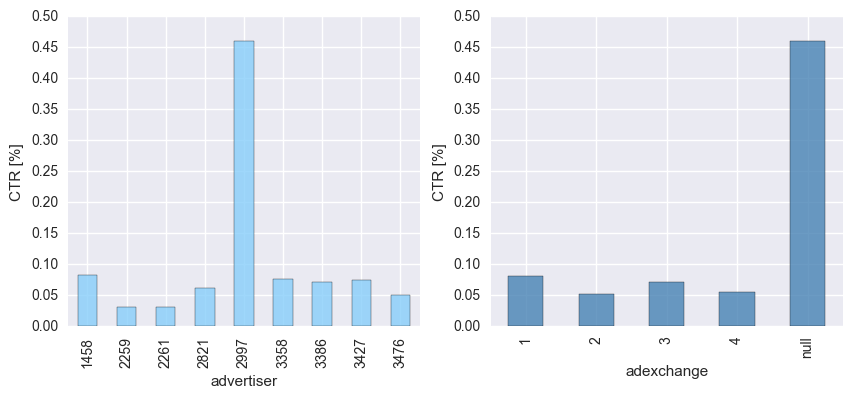

In [52]:
#Advertisers and adexchange - Try and condense the information into a heatmap for better presentation

fig, axes = plt.subplots(ncols = 2, figsize=(10,4) )

ax=ad_group.plot.bar('advertiser','CTR',legend= False, yticks= np.arange(0,0.55,0.05),ax=axes[0], color='lightskyblue',alpha=0.8)
ax1=adex_group.plot.bar('adexchange','CTR',legend= False, yticks= np.arange(0,0.55,0.05),ax=axes[1], sort_columns = True, color='steelblue',alpha=0.8)
ax.set_ylabel('CTR [%]')
ax1.set_ylabel('CTR [%]')
#Save image
#plt.savefig('advertiser-adexchange.jpg',bbox_inches='tight')

#### Bootstrapping the payprice to get an idea

In [53]:
df.click.size

2697738

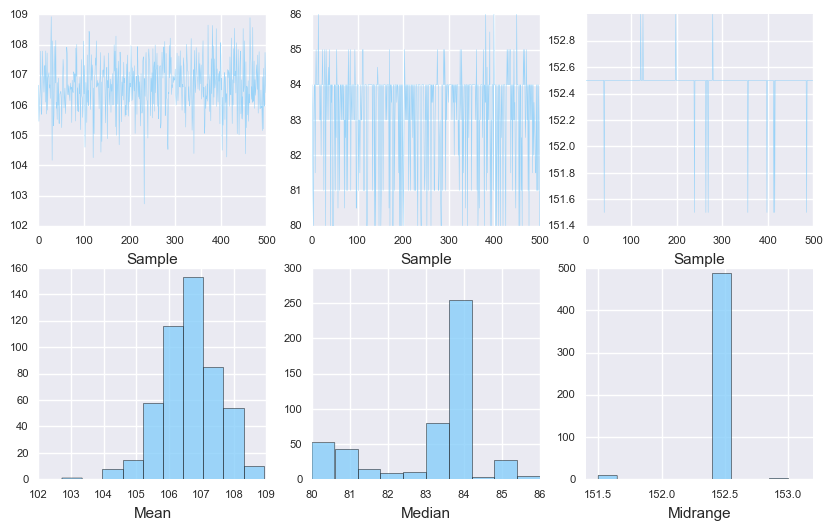

In [54]:
from pandas.tools.plotting import bootstrap_plot

bootstrap_plot(df[df['click'] == 1].payprice, size =1500, samples =500, color ='lightskyblue', alpha =0.8, linewidth=0.4).set_size_inches(10,6) #Size = batch size , .tight_layout()

#Save image
#plt.savefig('Bootstrap-payprice.jpg',bbox_inches='tight')

In [55]:
df[df['click'] == 1].payprice.value_counts(sort=True).skew() #towards the lower end

8.4178436657878368

In [56]:
df[df['click'] == 1].payprice.value_counts(sort=True).kurt() # high possibility of outliers heavy tailed distribution

91.043508466692202

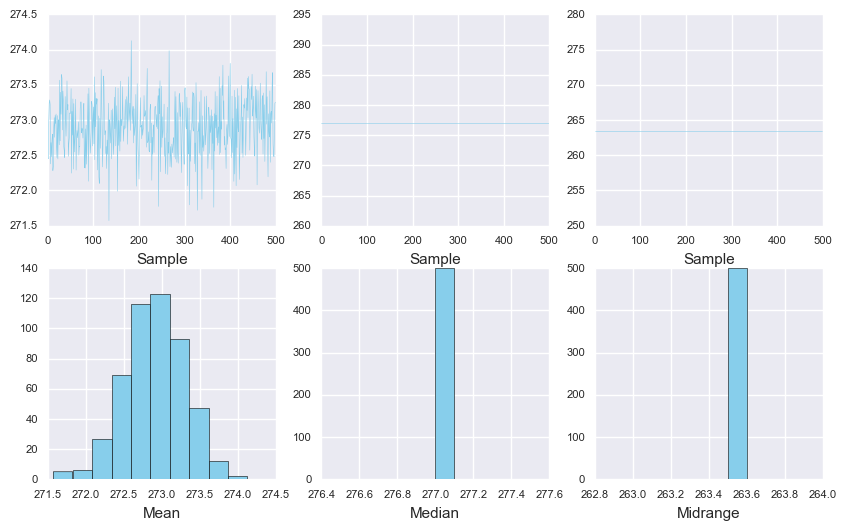

In [57]:
from pandas.tools.plotting import bootstrap_plot

bootstrap_plot(df[df['click'] == 1].bidprice, size =1500, samples =500, color ='skyblue', alpha =1, linewidth=0.4).set_size_inches(10,6) #Size = batch size , .tight_layout()

In [58]:
df[df['click'] == 1].bidprice.value_counts(sort=True).skew() #towards the lower end

2.1036672093461148

In [59]:
df[df['click'] == 1].bidprice.value_counts(sort=True).kurt() 

5.0938243825596548